# Surface wave forward problems

Objective of this notebook is to calculate the forward problems of surface waves in a 1D medium, using Geopsy(gpdc) sofrware and programs in "forward.py".

## 1. Parameter definition

Model parameters ad frequency vector should be defined before the calculation. Four parameters are generally needed: S-wave, P-wave, density and layer thickness.

Here, we have an example of a three-layer medium.

In [41]:
import numpy as np

# model parameters
thk = np.array([3.0, 5.0, 0], dtype = float) # the third layer is semi-infinite, thickness = 0 by default
dns = np.array([1000.0, 1500.0, 1700.0], dtype = float) # density
cvp = np.array([1100.0, 1300.0, 2000.0], dtype = float) # P-wave
cvs = np.array([600.0, 900.0, 1100.0], dtype = float) # S-wave

# frequency vector
fmin=10
fmax=500

f = np.linspace(fmin, fmax, 491)

## 2. Surface wave calculation using Geopsy

Geopsy/gpdc can be used in shell scipt. "gpdc_calculation" in math_func.py can make use of gpdc in Python environment to calculate Vph and Vg of Rayleigh waves. It is possible to change the lines in "gpdc_calculation" for Love wave calculation.

Attention: 
1. gpdc calculate the slowness (1/v) of surface waves.
2. Vs and Vp should follow the relation of Poisson's ratio, otherwise no dispersion curve will be calculated
3. Vg calculated by gpdc have 2 less values at the first and the last freqauncies

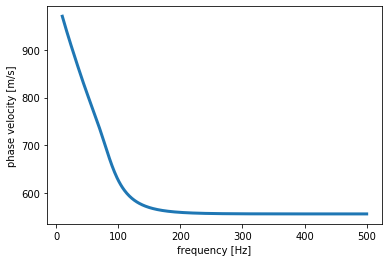

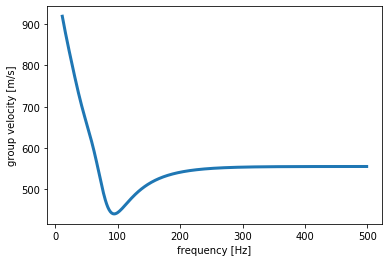

In [47]:
# import gpdc_calculation
from math_func import gpdc_calculation

# Vph calculation for the first mode
vph_gpdc = 1/(gpdc_calculation(f, cvp, cvs, dns, thk, 1, "phase")[:,1])

# Vg calculation for the first mode
vg_gpdc = 1/(gpdc_calculation(f, cvp, cvs, dns, thk, 1, "group")[:,1])

# plot dispersion curves
import matplotlib.pyplot as plt
plt.figure(figsize = [6,4])
plt.xlabel("frequency [Hz]"); plt.ylabel("phase velocity [m/s]")

plt.plot(f, vph_gpdc, linewidth = 3)

plt.figure(figsize = [6,4])
plt.xlabel("frequency [Hz]"); plt.ylabel("group velocity [m/s]")
plt.plot(f[1:-1], vg_gpdc, linewidth = 3)


## 3. Surface wave calculation using forward.py

"forward.py" is written by Ao Wang during her PhD study, based on the Matlab scripts of Lai (Lai 1998, Hisada 1994, Chen 1993). It can be used for the forward problem calculation of Rayleigh wave. "mat_disperse" is the function to be called in the main program.

We mention that gpdc is implemented in "forward.py" for Vph calculation, which saves computation time compared to "modal" function in "forward.py".

In [50]:
from forward import mat_disperse

# thickness vector doesn't have the zero for the semi-infinite layer 
# the rest of the model parameters are identical
thk = np.array([3.0, 5.0], dtype = float)

# r: displacement-stress vector; z : depth; 
# zdvrvs,zdvrvp,zdvrrho: partial derivative as function of depth
# dvrvs,dvrvp,dvrrho: partial derivative as function of layer
vph,r,z,zdvrvs,zdvrvp,zdvrrho,dvrvs,dvrvp,dvrrho = mat_disperse(thk, dns, cvp, cvs, f, opt=3)

(491, 1)


With the definitions of nf (length of frequency vector), nz (length of depth vector), nlayer (number of layer) and nmode (number of mode):

In [56]:
print("r is a 4*nz*nf*nmode matrix:", r.shape)
print("zdvrvs is a nz*nf*nmode matrix:", zdvrvs.shape)
print("dvrvs is a nlayer*nf*nmode matrix:", dvrvs.shape)

r is a 4*nz*nf*nmode matrix: (4, 5000, 491, 1)
zdvrvs is a nz*nf*nmode matrix: (5000, 491, 1)
dvrvs is a nlayer*nf*nmode matrix: (3, 491, 1)


Example of partial derivative of three layers as function of wavelength:

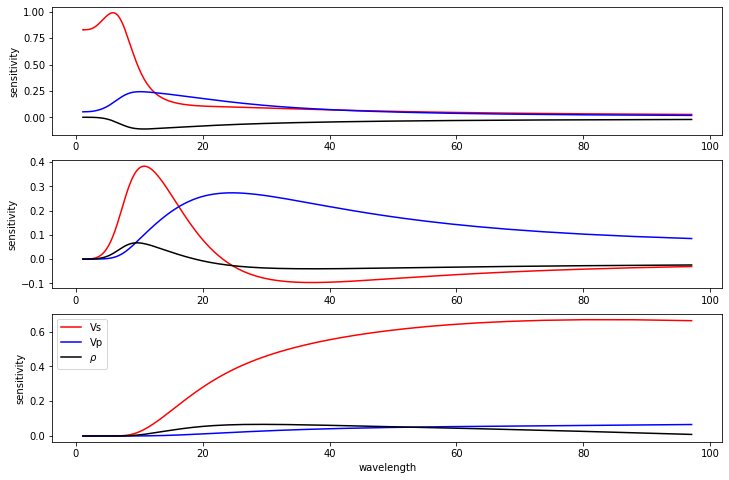

In [73]:
# attenuation can also be taken into account (imaginary part). In this example, Img = 0
vph = vph.reshape(len(vph))
zdvrvs,zdvrvp,zdvrrho = np.real(zdvrvs), np.real(zdvrvp), np.real(zdvrrho)
dvrvs,dvrvp,dvrrho = np.real(dvrvs), np.real(dvrvp), np.real(dvrrho)

# wavelegth vector
wavelength = vph/f

fig, ax = plt.subplots(3,1, figsize = [12, 8])
plt.setp(ax, ylabel = "sensitivity")
plt.setp(ax[2], xlabel = "wavelength")

ax[0].plot(wavelength, dvrvs[0,:,0], 'r')
ax[0].plot(wavelength, dvrvp[0,:,0], 'b')
ax[0].plot(wavelength, dvrrho[0,:,0], 'k')

ax[1].plot(wavelength, dvrvs[1,:,0], 'r')
ax[1].plot(wavelength, dvrvp[1,:,0], 'b')
ax[1].plot(wavelength, dvrrho[1,:,0], 'k')

ax[2].plot(wavelength, dvrvs[2,:,0], 'r', label = "Vs")
ax[2].plot(wavelength, dvrvp[2,:,0], 'b', label = "Vp")
ax[2].plot(wavelength, dvrrho[2,:,0], 'k', label = r"$\rho$" )
plt.legend()

## References

Chen, X. (1993). A systematic and efficient method of computing normal modes for multilayered half-space.
Geophysical Journal International, 115(2):391-409.

Hisada, Y. (1994). An efficient method for computing green's functions for a layered half-space with sources and receivers at close depths. Seismological Society of America , 84(5):1456-1472.

Lai, C. G. and Rix, G. J. (1998). Simultaneous inversion of rayleigh phase velocity and attenuation for near-surface site characterization.